In [4]:
from scheme_rl.envs.riemann2d import RiemannConfig3Env, RiemannConfig3HighRes256Env, RiemannConfig3HighRes512Env
from scheme_rl.postprocessing.utils import test_deterministic_reward
import pandas as pd
from stable_baselines3 import PPO
from scheme_rl.envs.env_base import AlpacaEnv
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scheme_rl.postprocessing.config import envs_name, time_config

def plot_reward(
    name: str,
    cells: int,
    ignore_t: list = []
):
    baseline = "weno5"
    envs_names = envs_name(name)

    teno5_to_weno5 = pd.read_csv(f"/media/yiqi/Elements/RL/August/{name}/{envs_names[cells]}/teno5_to_{baseline}_reward.csv")
    teno5lin_to_weno5 = pd.read_csv(f"/media/yiqi/Elements/RL/August/{name}/{envs_names[cells]}/teno5lin_to_{baseline}_reward.csv")
    teno5rl_to_weno5 = pd.read_csv(f"/media/yiqi/Elements/RL/August/{name}/{envs_names[cells]}/teno5rl_to_{baseline}_reward.csv")
    
    df = pd.concat([teno5_to_weno5["t"], teno5_to_weno5["reward"], teno5lin_to_weno5["reward"], teno5rl_to_weno5["reward"]], axis=1)
    df.columns = ["t", "TENO5", "TENO5SP", "TENO5RL"]
    for t in ignore_t:
        df = df.drop(df.index[df["t"] == t])
    ax = df.plot(x="t", xlim=(0, time_config(name)["end_time"]), figsize=(5, 4), grid=True)
    ax.set_title(r"Instant Reward, $" + str(cells) + r"\times " + str(cells) + r"$")
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$\%$")
    ax.legend(fontsize=12)
    plt.tight_layout()

In [ ]:
from scheme_rl.postprocessing.utils import plot_test_results
import numpy as np
config = {
    "extent": [0, 1.2, 0, 1.2],
    "vmin": 0.15,
    "vmax": 1.7,
    "cmap": "viridis",
    "linewidths": 0.8,
    "levels": np.arange(0.15, 1.7001, 0.05),
    "xticks": [0, 0.6, 1.2],
    "yticks": [0, 0.6, 1.2],
    "contour_alpha": 0.5
}
plot_test_results("config3", "1.100", "density", config, ["contour"], dpi=100)

In [2]:
from scheme_rl.postprocessing.utils import compute_improvement, plot_improvement
compute_improvement(name="config3", cells=64)

teno5rl to weno5:
100.0% ... 


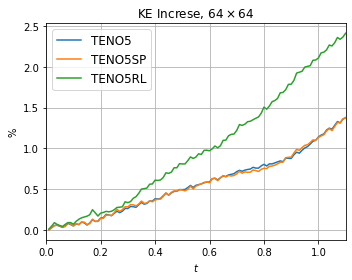

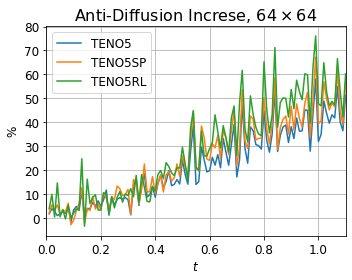

In [3]:
plot_improvement(name="config3", cells=64)

In [4]:
from scheme_rl.postprocessing.utils import compute_reward
compute_reward(name="config3", cells=64)

teno5rl to weno5:
100.0% ... 


In [61]:
import matplotlib.pyplot as plt
from scheme_rl.postprocessing.config import envs_name, time_config

def plot_reward(
    name: str,
    cells: int,
    ignore_t: list = []
):
    baseline = "weno5"
    envs_names = envs_name(name)

    teno5_to_weno5 = pd.read_csv(f"/media/yiqi/Elements/RL/August/{name}/{envs_names[cells]}/teno5_to_{baseline}_reward.csv")
    teno5lin_to_weno5 = pd.read_csv(f"/media/yiqi/Elements/RL/August/{name}/{envs_names[cells]}/teno5lin_to_{baseline}_reward.csv")
    teno5rl_to_weno5 = pd.read_csv(f"/media/yiqi/Elements/RL/August/{name}/{envs_names[cells]}/teno5rl_to_{baseline}_reward.csv")
    
    df = pd.concat([teno5_to_weno5["t"], teno5_to_weno5["reward"], teno5lin_to_weno5["reward"], teno5rl_to_weno5["reward"]], axis=1)
    df.columns = ["t", "TENO5", "TENO5SP", "TENO5RL"]
    for t in ignore_t:
        df = df.drop(df.index[df["t"] == t])
    ax = df.plot(x="t", xlim=(0, time_config(name)["end_time"]), figsize=(5, 4), grid=True)
    ax.set_title(r"Instant Reward, $" + str(cells) + r"\times " + str(cells) + r"$")
    ax.set_xlabel(r"$t$")
    ax.set_ylabel(r"$\%$")
    ax.legend(fontsize=12)
    plt.tight_layout()

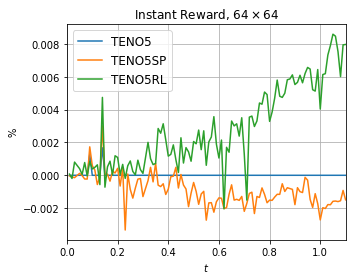

In [63]:
plot_reward(name="config3", cells=64, ignore_t=[0.04, 0.31])

In [ ]:
from scheme_rl.postprocessing.utils import plot_test_results
import numpy as np
"""
config for 
    imshow:  extent, vmin, vmax, cmap, xticks, yticks
    contour: extent, colors, linewidths, levels, xticks, yticks
"""
config = {
    "extent": [0, 0.3, 0, 0.3],
#     "vmin": 0.4,
    "vim": None,
#     "vmax": 1.1,
    "vmax": None,
    "cmap": "viridis",
    "levels": np.arange(0.4, 1.1001, 0.05),
    "xticks": [0, 0.15, 0.3],
    "yticks": [0, 0.15, 0.3],
    "contour_alpha": 1
}
plot_test_results("implosion", "2.500", "density", config, ["imshow"], dpi=100)

In [2]:
from scheme_rl.postprocessing.utils import compute_improvement, plot_improvement
compute_improvement(name="implosion", cells=64)

teno5rl to weno5:
100.0% ... 


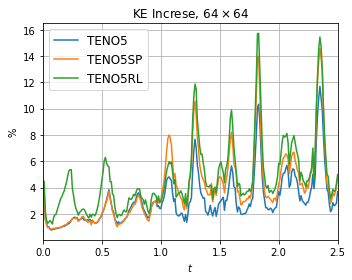

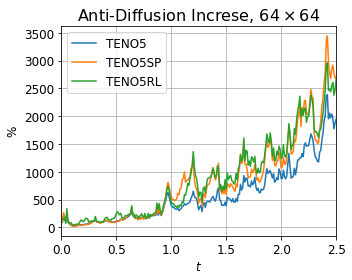

In [3]:
plot_improvement(name="implosion", cells=64)

In [6]:
from scheme_rl.postprocessing.utils import compute_reward
compute_reward(name="implosion", cells=64)

teno5rl to weno5:
100.0% ... 


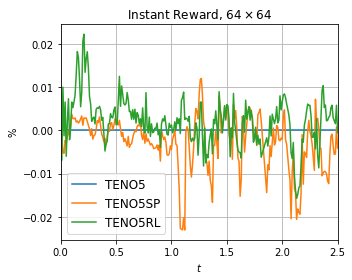

In [8]:
plot_reward(name="implosion", cells=64, ignore_t=[1.82, 1.83, 1.84, 1.85])